# Ficha de Expressões Regulares 1

Autora: Sofia Santos

---

Cartoon relevante

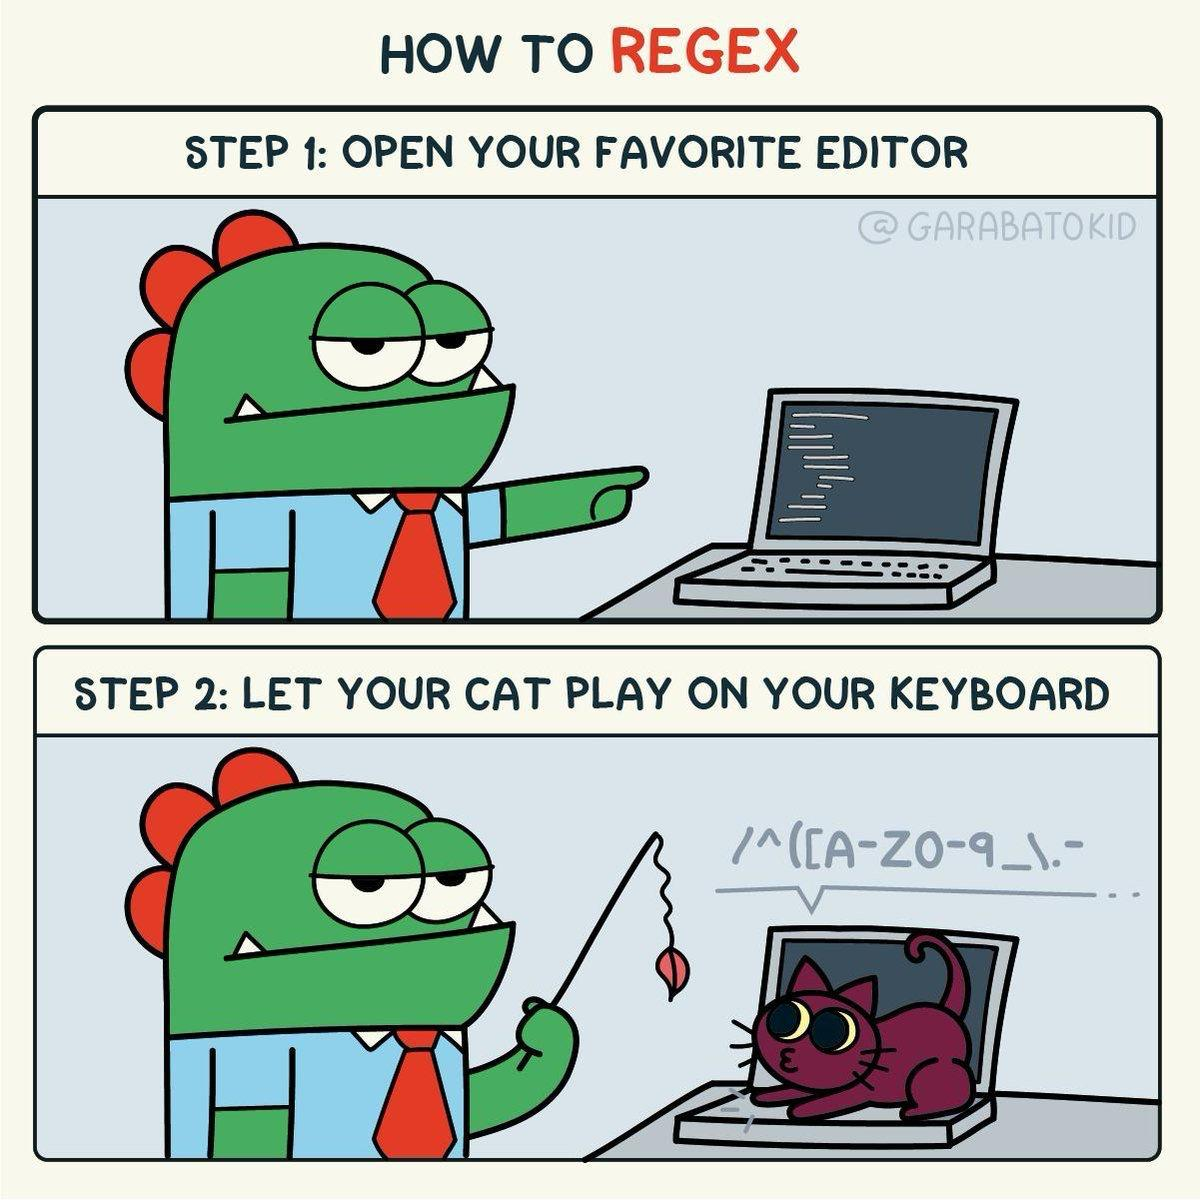

### Conceitos básicos de expressões regulares

- `a` - corresponde a uma ocorrência do caracter `a`.
- `a?` - corresponde a 0 ou 1 ocorrências do caracter `a`.
- `a+` - corresponde a 1 ou mais ocorrências do caracter `a`.
- `a*` - corresponde a 0 ou mais ocorrências do caracter `a`.
- `[abc]` - corresponde a uma ocorrência de um dos caracteres `a`, `b` ou `c`.
- `[a-z]` - corresponde a uma ocorrência de um caracter entre `a` e `z`.
- `^` - corresponde ao início da string.
- `$` - corresponde ao fim da string.
- `[^abc]` - corresponde a uma ocorrência de qualquer caracter que não seja `a`, `b` ou `c`.
- `.` - corresponde a uma ocorrência de qualquer caracter (exceto `'\n'`).

Podemos usar o operador de união para unir várias expressões regulares. Por exemplo: `a|bbb|[^a-z]`, que corresponde a uma das várias (neste caso, 3) expressões regulares que fazem parte da união.

Podemos simplificar expressões regulares como `bbb` para `b{3}`, ou seja, 3 ocorrências consecutivas do caracter `b`, neste caso. Outras opções incluem `b{3,}` para 3 ou mais ocorrências ou `b{3,6}` para entre 3 a 6 ocorrências, por exemplo.

Para formar grupos de expressões regulares, usamos parênteses. Por exemplo: `((abc)*|[0-9]+)?`. Os operadores após um grupo atuam sobre o grupo.

**NOTA**: Como o caracter `.` (ponto final) numa expressão regular já tem um significado próprio, se precisarmos de fazer uma correspondência literal do caracter `.`, usamos a sequência de escape `\.`.

Para utilizar expressões regulares no nosso código Python, podemos recorrer ao módulo `re`, importado da seguinte forma:

In [2]:
import re

## Exercício 1

### Alínea 1.1

Dada uma linha de texto, define um programa que determina se a palavra "hello" aparece no início da linha.

Conceitos importantes para este exercício:

- `re.match(pattern, string[, flags])` - analisa a `string` e tenta encontrar uma correspondência para a expressão regular `pattern` a partir do início da string. Devolve `None` se não encontrar nenhuma correspondência.
- `r""` - string correspondente a uma expressão regular.

In [8]:
line1 = "hello world"
line2 = "goodbye world"
line3 = "hi, hello there"

# ...

out = [line1,line2,line3]

for i in out:
    print(re.match(r'^hello', i))




<re.Match object; span=(0, 5), match='hello'>
None
None


### Alínea 1.2

Dada uma linha de texto, define um programa que determina se a palavra "hello" aparece em qualquer posição da linha.

Conceitos importantes para este exercício:

- `re.search(pattern, string[, flags])` - analisa a `string` e tenta encontrar uma correspondência para a expressão regular `pattern` em qualquer posição da string. Devolve `None` se não encontrar nenhuma correspondência.

In [7]:
line1 = "hello world"
line2 = "goodbye world"
line3 = "hi, hello there"

out = [line1,line2,line3]

for i in out:
    print(re.search(r"hello",i))

# ...

<re.Match object; span=(0, 5), match='hello'>
None
<re.Match object; span=(4, 9), match='hello'>


### Alínea 1.3

Dada uma linha de texto, define um programa que pesquisa por todas as ocorrências da palavra "hello" dentro da linha, admitindo que a palavra seja escrita com maiúsculas ou minúsculas.

Conceitos importantes para este exercício:

- `re.findall(pattern, string[, flags])` - encontra todas as correspondências que não se sobreponham da expressão regular `pattern` na `string`. Devolve uma lista.

In [ ]:
line = "Hello there! Uh, hi, hello, it's me... Heyyy, hello? HELLO!"

#re.findall(r"(h|H)(e|E)(l|L)()", line)

# ...

[('H', 'e', 'l', 'l', 'o'), ('h', 'e', 'l', 'l', 'o'), ('h', 'e', 'l', 'l', 'o'), ('H', 'E', 'L', 'L', 'O')]


### Alínea 1.4

Dada uma linha de texto, define um programa que pesquisa por todas as ocorrências da palavra "hello" dentro da linha, substituindo cada uma por "\*YEP\*".

Conceitos importantes para este exercício:

- `re.sub(pattern, replacement, string, count = 0, flags = 0)` - substitui todas as correspondências da expressão regular `pattern` na `string` por `replacement`. `replacement` pode ser uma string, uma expressão regular ou uma função que recebe uma correspondência e devolve uma string. O parâmetro `count` determina o limite de substituições (por defeito é 0, ou seja, não há limite).

In [ ]:
line = "Hello there! Uh, hi, hello, it's me... Heyyy, hello? HELLO!"

# ...

### Alínea 1.5

Dada uma linha de texto, define um programa que pesquisa por todas as ocorrências do caracter vírgula, separando cada parte da linha por esse caracter.

Conceitos importantes para este exercício:

- `re.split(pattern, string, maxsplit = 0, flags = 0)` - divide a `string` com base nas correspondências da expressão regular `pattern`. O parâmetro `maxsplit` pode ser usado para definir um limite de divisões (por defeito é 0, que corresponde a divisões infinitas).

In [ ]:
line = "bananas, laranjas, maçãs, uvas, melancias, cerejas, kiwis, etc."

# ...

## Flags do módulo re

O módulo re possui *flags* que podemos usar nas suas funções. As mais úteis são:

- `re.I` ou `re.IGNORECASE`: faz uma correspondência *case insensitive*.
- `re.M` ou `re.MULTILINE`: os tokens de âncora `^` e `$` passam a corresponder ao início/fim de cada linha, em vez do início/fim de uma string.
- `re.S` ou `re.DOTALL`: o token `.` passa a corresponder também a um caracter `\n`.

Podemos usar estas flags da seguinte forma: `re.search(r'trans.*mar', "TRANSF\nORMAR", re.I | re.S)`

## Exercício 2

Define a função `palavra_magica` que recebe uma frase e determina se a mesma termina com a expressão "por favor", seguida de um sinal válido de pontuação.

In [21]:
def palavra_magica(frase):
  return re.match(r".* por favor[\.,!?]$",frase)

print(palavra_magica("Posso ir à casa de banho, por favor?"))
print(palavra_magica("Preciso de um favor."))
print(palavra_magica("Sim, por favor, obrigado."))



<re.Match object; span=(0, 36), match='Posso ir à casa de banho, por favor?'>
None
None


## Exercício 3

Define a função `narcissismo` que calcula quantas vezes a palavra "eu" aparece numa string.

In [31]:
def narcissismo(linha):
  return len(re.findall(r"(\W|^)eu(\W|$)",linha, re.I))

print(narcissismo("Eu não sei se eu quero continuar a ser eu. Por outro lado, eu ser eu é uma parte importante de quem EU sou."))

6


## Exercício 4

Define a função `troca_de_curso` que substitui todas as ocorrências de "LEI" numa linha pelo nome do curso dado à função.

In [35]:
def troca_de_curso(linha, novo_curso):
  return re.sub(r"LEI",novo_curso,linha)

print(troca_de_curso("LEI é o melhor curso! Adoro LEI! Gostar de LEI devia ser uma lei.","LCC"))


LCC é o melhor curso! Adoro LCC! Gostar de LCC devia ser uma lei.


## Exercício 5

Define a função `soma_string` que recebe uma string com vários números separados por uma vírgula (e.g., "1,2,3,4,5") e devolve a soma destes números.

In [40]:
def soma_string(linha):
  return sum(map(int,re.split(r",",linha)))

print(soma_string("4,-6,2,3,8,-3,0,2,-5,1"))

6


## Exercício 6

Define a função `pronomes` que encontra e devolve todos os pronomes pessoais presentes numa frase, i.e., "eu", "tu", "ele", "ela", etc., com atenção para letras maiúsculas ou minúsculas.

In [ ]:
def pronomes(linha):
    #return re.findall(r"((^|\W)nos($|\W)|(^|\W)eu($|\W)|(^|\W)ele($|\W)|(^|\W)ela($|\W)|(^|\W)tu($|\W))",linha, re.I)
    pass


#print(pronomes("eu tu nos bota nelas eu eu ela ela somos todos iguais!!!"))

[('eu ', '', '', '', ' ', '', '', '', '', '', ''), (' nos ', ' ', ' ', '', '', '', '', '', '', '', ''), (' eu ', '', '', ' ', ' ', '', '', '', '', '', ''), (' ela ', '', '', '', '', '', '', ' ', ' ', '', '')]


## Exercício 7

Define a função `variavel_valida` que recebe uma string e determina se a mesma é um nome válido para uma variável, ou seja, se começa por uma letra e apenas contém letras, números ou *underscores*.

## Exercício 8

Define a função `inteiros` que devolve todos os números inteiros presentes numa string. Um número inteiro pode conter um ou mais dígitos e pode ser positivo ou negativo.

## Exercício 9

Define a função `underscores` que substitui todos os espaços numa string por *underscores*. Se aparecerem vários espaços seguidos, devem ser substituídos por apenas um *underscore*.

## Exercício 10

Define a função `codigos_postais` que recebe uma lista de códigos postais válidos e divide-os com base no hífen. A função deve devolver uma lista de pares.

In [ ]:
lista = [
    "4700-000",
    "1234-567",
    "8541-543",
    "4123-974",
    "9481-025"
]

# ...